<a href="https://colab.research.google.com/github/shelfertmurphy/FromScratchML/blob/main/KMeansFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

The K-Mean algorithm takes data points (vectors) and groups the data points into K clusters by minimizing the distance of all data points to the closest centroid (center of a cluster). If we fix a centroid ($\mu_j$) and minimize the distance from a data point $x^i$ to that centroid, our value of $r_{ij}$ will return 1 becasue the one indicates that our data point $x^i$ will be a member of that cluster. Otherwise, we return a 0. Then, we can fix the clusters $r_{ij}$ and minimize over the centroid, we will find that the centroids can be computed by $u_j=\sum_i\frac{r_{ij}x^i}{r_{ij}}.$ This is because we are finding the centroids that minimize the total distance between points and clusters when compared to other groupings.

My implementation follows. All values of K produce a black and white image, but as K increases the variety of shades in between black and white increases. We get more shades of grey.

In [ ]:
import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray



#define function to calculate euclidean distance
def euc_dist(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

class KMeans:

  def __init__(self, K=4, max_iters=100):
    self.K = K
    self.max_iters = max_iters

    #initialize clusers
    #start by creating an empty array for each of K clusters:
    #this is a list of sample indices for each cluster, list of lists, just indices
    self.clusters = [[] for _ in range(self.K)]

    #store mean feature vector for each cluster (storing actual samples here)
    self.centroids = []

  def predict(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape

    #initialize centroids:
    #random_sample_idxs is an array of size K that selects a number between 0 and the number of samples
    #replace=False means we can't pick the same index twice
    random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
    
    #now, assign the according sample to the index as a centroid
    #for each idx in r_s_i, take that entry from X and put it in centroids (list comprehension)
    self.centroids = [self.X[idx] for idx in random_sample_idxs]


    
    for _ in range(self.max_iters):
      #update clusters using helper functions
      self.clusters = self.create_clusters(self.centroids)

      #update centroids
      centroids_old = self.centroids
      self.centroids = self.get_centroids(self.clusters)

      #check if converge (clusters no longer change)
      if self.is_converged(centroids_old, self.centroids):
        break

    #return cluster labels
    return self.new_matrix(self.X, self.clusters, self.centroids)

  #helper function to create clusters
  def create_clusters(self, centroids):
    clusters = [[] for _ in range(self.K)]
    #iterate through each sample in X
    for idx, sample in enumerate(self.X):
      centroid_idx = self.closest_centroid(sample, centroids) #find closest cluster
      clusters[centroid_idx].append(idx) #put current sample idx in the closest cluster
    return clusters

  #helper function to find closest centroid to a sample
  #calc dist of current sample to each centroid, and get the idx of centroid with closest dist
  def closest_centroid(self, sample, centroids):
    distances = [euc_dist(sample, point) for point in centroids] #array containing dist of point to each centroid
    closest_idx = np.argmin(distances) #finds idx of closest centroid to point
    return closest_idx

  #helper function to get centroids
  #assign the mean value of the clusters to the centroids, for each cluster we calculate the mean
  def get_centroids(self, clusters):
    #initialze to 0
    centroids = np.zeros((self.K, self.n_features)) #for each cluster, store feature vector
    #iterate over clusters
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster], axis=0) #self.X[cluster] returns samples in current cluster
      centroids[cluster_idx] = cluster_mean
    return centroids

  #helper function to check if clusters are changing still
  def is_converged(self, centroids_old, centroids):
    distances = [euc_dist(centroids_old[i], centroids[i]) for i in range(self.K)] #dist bnold and new centroids
    return sum(distances) == 0 #if distances are 0, then return

  #helper function to get cluster labels
  def get_cluster_labels(self, clusters):
    labels = np.empty(self.n_samples)
    for cluster_idx, cluster in enumerate(clusters):
      for sample_idx in cluster:
        labels[sample_idx] = cluster_idx
    return labels

  def new_matrix(self, X, clusters, centroids):
    for cluster_idx, cluster in enumerate(clusters):
      for row in self.X:
        self.X[row] = centroids[cluster_idx]
    return X

(159, 318, 3)
(50562, 3)
Number of samples:
50562
Number of features:
3


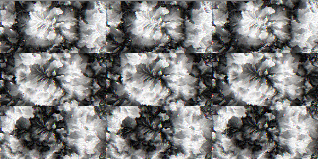

In [ ]:


#read image in as an array and print the dimensions
image = Image.open('rgbimg.jpeg')
imageData = asarray(image)
print(imageData.shape)


#reshape imgarray to be 2 dimensions, now imgarray is a 1000500x3 array, with 1000500 samples, each having 3 features
rows = imageData.shape[0]
cols = imageData.shape[1]
imageData = imageData.transpose(2,0,1).reshape(-1,3)
print(imageData.shape)
m=imageData.shape[0]
n=imageData.shape[1]
print("Number of samples:")
print(m) #number of samples (rows)
print("Number of features:")
print(n) #number of features (columns)

k = KMeans(K=4, max_iters=100)
newX = k.predict(imageData)

compressed_img = newX.reshape(rows, cols, 3)


image2 = Image.fromarray(compressed_img)
image2



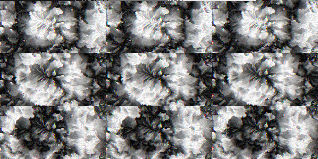

In [ ]:
k = KMeans(K=8, max_iters=100)
newX = k.predict(imageData)

compressed_img = newX.reshape(rows, cols, 3)


image2 = Image.fromarray(compressed_img)
image2

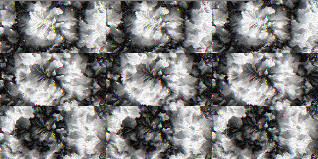

In [ ]:
k = KMeans(K=16, max_iters=100)
newX = k.predict(imageData)

compressed_img = newX.reshape(rows, cols, 3)


image2 = Image.fromarray(compressed_img)
image2